## Instacart data로 구매 패턴 분석해보기

[데이터 설명]
- 이 데이터셋은 시간에 따른 고객 주문을 설명하는 csv 파일들로 구성되어 있습니다.

- 이 데이터는 사용자가 다음 주문에 포함할 제품들을 예측하는 것입니다. 즉, 어떤 물품을 다시 주문할지 예측하는 문제를 풀어야 합니다.

- 데이터셋은 익명화되어 있으며 20만 명이 넘는 instacart 사용자의 300만건 이상의 주문들을 포함하고 있습니다.

- 각 사용자별로, 4회에서 100회 사이의 주문 데이터가 제공됩니다. 또한 주문이 이루어진 주와 시간, 그리고 주문 간의 상대적인 시간을 제공합니다.

- 데이터 파일은 6개로 구성되어 있으며, 각 csv 파일에 대한 설명은 다음과 같습니다.

각 csv파일들(customer, product, order, aisle, etc.)은 각자의 unique id를 포함하고 있습니다. 각 파일들의 대한 설명을 csv파일 이름과 column 이름을 읽으면 이해 가능한 수준입니다.

[csv별 설명]
1. aisle.csv - 아이템 중분류

2. department.csv - 아이템 대분류

3. orders.csv - 각 주문 내역들에 대한 정보

4. order_products__train.csv - 모든 고객의 이전 주문 내용이 포함되어 있습니다. 'reordered' column은 어떤 고객이 과거에 구매여부를 의미합니다. 일부 주문에는 reordered 품목이 없을 수 있습니다. reordered 품목이 없는 주문의 경우 명시적으로 '없음' 값을 예측할 수 있습니다.

5. products.csv - 각 아이템들에 대한 정보


**이제 위에서 주어진 정보를 기반으로 EDA를 수행하여 아래 10개의 질문에 대한 답변을 출력하는 파이썬 코드를 작성하세요.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Q1. instacart-market-basket-analysis 폴더에서 데이터를 모두 불러오세요.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from os import read
# 데이터를 불러오면 처음 무조건 파악해야하는 것!
## data_path는 데이터가 있는 폴더의 경로를 의미합니다.
data_path = ('/content/drive/MyDrive/AI Lab/4. Python EDA_김용담강사님/EDA')
aisles = pd.read_csv('/content/drive/MyDrive/AI Lab/4. Python EDA_김용담강사님/EDA/aisles.csv/aisles.csv')
departments = pd.read_csv('/content/drive/MyDrive/AI Lab/4. Python EDA_김용담강사님/EDA/departments.csv/departments.csv')

orders = pd.read_csv('/content/drive/MyDrive/AI Lab/4. Python EDA_김용담강사님/EDA/orders.csv/orders.csv')
train = pd.read_csv('/content/drive/MyDrive/AI Lab/4. Python EDA_김용담강사님/EDA/order_products__train.csv/order_products__train.csv')
products = pd.read_csv('/content/drive/MyDrive/AI Lab/4. Python EDA_김용담강사님/EDA/products.csv/products.csv')

In [ ]:
#aisles.head()
#departments.head()
orders.head()
#train.head()
#products.head()


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [ ]:
print(aisles.shape)
print(departments.shape)
print(orders.shape)
print(train.shape)
print(products.shape)

(134, 2)
(21, 2)
(3421083, 7)
(1384617, 4)
(49688, 4)


In [ ]:
print(aisles.info())
print(departments.info())
print(orders.info())
print(train.info())
print(products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow       

### Q2. 어떤 Product가 가장 많이 reorder가 되었는가?

In [ ]:
train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [ ]:
train.groupby('product_id')['reordered'].sum().sort_values(ascending=False)

product_id
24852    16557
13176    13362
21137     8603
21903     8055
47766     6226
         ...  
26461        0
41292        0
26464        0
15047        0
31934        0
Name: reordered, Length: 39123, dtype: int64

In [ ]:
train.groupby('product_id')['reordered'].sum().max()

16557

In [ ]:
train.groupby('product_id')['reordered'].sum().idxmax()

24852

## Q2. Solution

In [ ]:
data = pd.merge(train, products, on='product_id', how = 'inner')
data.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,1,49302,1,1,Bulgarian Yogurt,120,16
1,816049,49302,7,1,Bulgarian Yogurt,120,16
2,1242203,49302,1,1,Bulgarian Yogurt,120,16
3,1383349,49302,11,1,Bulgarian Yogurt,120,16
4,1787378,49302,8,0,Bulgarian Yogurt,120,16


In [ ]:
pd.pivot_table(data, index = 'product_name', values = 'reordered', aggfunc = 'sum').sort_values(by = 'reordered', ascending = False)[:1]

,reordered
product_name,
Banana,16557


In [ ]:
pd.pivot_table(data, index = 'product_name', values = 'reordered', aggfunc = 'sum')\
                  .sort_values(by = 'reordered', ascending = False)[:1]

,reordered
product_name,
Banana,16557


### Q3. 가장 많이 주문된 Product는?

# Q3. Solution

In [ ]:
pd.pivot_table(data, index = 'product_name', values= 'order_id', aggfunc = 'count').sort_values(by = 'order_id', ascending = False)[:1]

,order_id
product_name,
Banana,18726


In [ ]:
pd.pivot_table(data, index = 'product_name', values= 'order_id', aggfunc = 'count')\
                  .sort_values(by = 'order_id', ascending = False)[:1]

,order_id
product_name,
Banana,18726


### Q4. reorder가 가장 많이 일어나는 department는?

In [ ]:
data = pd.merge(data, departments, on = 'department_id', how = 'inner')
data.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department
0,1,49302,1,1,Bulgarian Yogurt,120,16,dairy eggs
1,816049,49302,7,1,Bulgarian Yogurt,120,16,dairy eggs
2,1242203,49302,1,1,Bulgarian Yogurt,120,16,dairy eggs
3,1383349,49302,11,1,Bulgarian Yogurt,120,16,dairy eggs
4,1787378,49302,8,0,Bulgarian Yogurt,120,16,dairy eggs


In [ ]:
pd.pivot_table(data, index = 'department', values = 'reordered', aggfunc = 'sum')\
                    .sort_values(by = 'reordered', ascending = False)[:1]

,reordered
department,
produce,271886


### Q5. order를 가장 많이 한 user는?

In [ ]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


# Q5. Solution

In [ ]:
pd.pivot_table(orders, index = 'user_id', values = 'order_id', aggfunc = 'count').sort_values(by = 'order_id', ascending = False)

,order_id
user_id,
152340,100
185641,100
185524,100
81678,100
70922,100
...,...
13046,4
70208,4
111440,4


In [ ]:
orders.loc[orders['order_number'] == 100, 'user_id'].values

array([   210,    310,    313, ..., 205878, 205972, 206105])

### Q6. order가 가장 많이 일어난 요일을 bargraph로 나타내면?

In [ ]:
orders.loc[orders['order_dow']].value_counts()

order_id  user_id  eval_set  order_number  order_dow  order_hour_of_day  days_since_prior_order
2398795   1        prior     2             3          7                  15.0                      587478
473747    1        prior     3             3          12                 21.0                      467260
3367565   1        prior     6             2          7                  19.0                      453368
550135    1        prior     7             1          9                  20.0                      448761
2254736   1        prior     4             4          7                  29.0                      436972
431534    1        prior     5             4          15                 28.0                      426339
Name: count, dtype: int64

# Q6. Solutions

<ipython-input-22-fb184cc55226>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(orders, x = 'order_dow', palette = 'viridis')


<Axes: xlabel='order_dow', ylabel='count'>

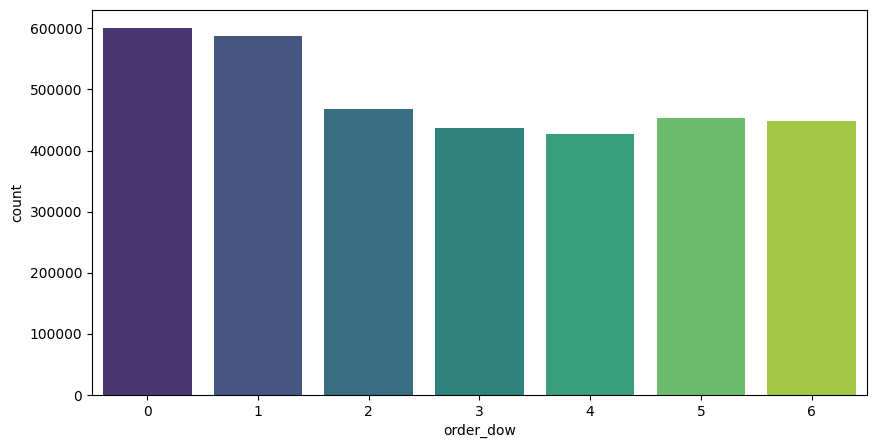

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(orders, x = 'order_dow', palette = 'viridis')

### Q7. 재구매율이 높은 product top10은?

In [ ]:
#data.pivot_table(index='product_name', values='reordered', aggfunc=['mean', 'sum', 'count'])
data.pivot_table(index='product_name', values='reordered', aggfunc=['mean', 'sum', 'count'])\
                    .sort_values(by='reordered', ascending=False)[:10]

KeyError: 'reordered'

### Q8. 재구매가 가장 많이 일어나는 요일 top3는?

In [ ]:
data = pd.merge(data, orders, on = 'order_id')
data.pivot_table(index='order_dow', values='reordered', aggfunc='sum')\
                    .sort_values(by='reordered', ascending=False)[:3]

,reordered
order_dow,
0,197534
1,123376
6,123173


### Q9. days_since_prior에 따른 reorder 횟수 변화를 lineplot과 barplot으로 나타내면?

- x축은 서로 다른 reorder 횟수가 됩니다.

<Axes: xlabel='days_since_prior_order'>

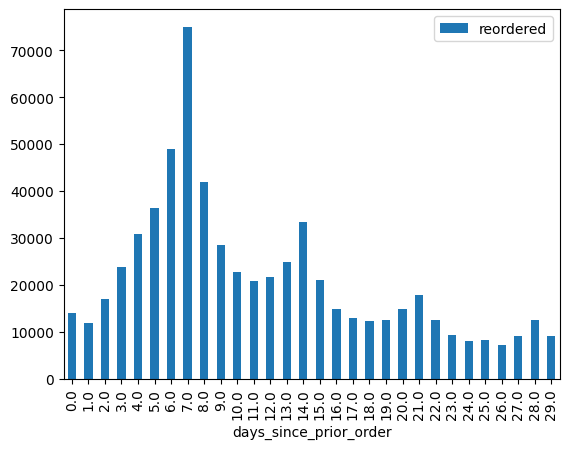

In [ ]:
# 1) Pandas Plot
pt = pd.pivot_table(data, index='days_since_prior_order',
                    values='reordered', aggfunc='sum').drop(30.0)
pt.plot(kind='bar')

<Axes: xlabel='days_since_prior_order', ylabel='reordered'>

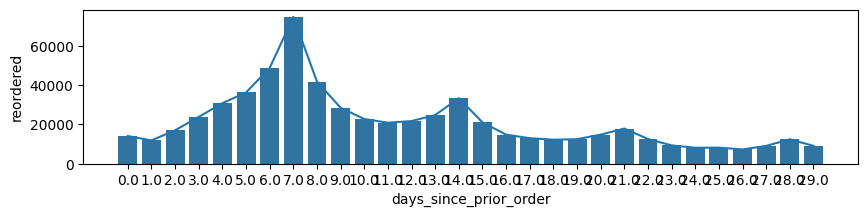

In [ ]:
# 2) seaborn
plt.figure(figsize=(10,2))
pt = pt.reset_index(drop=True) #drop=True를 지정하여 기존 인덱스를 열로 추가하지 않도록 함
sns.barplot(pt, x='days_since_prior_order', y='reordered')
sns.lineplot(pt, x='days_since_prior_order', y='reordered')

<Axes: xlabel='None', ylabel='reordered'>

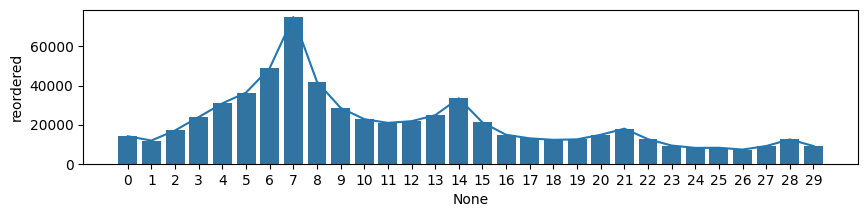

In [ ]:
# 3) seaborn
plt.figure(figsize=(10,2))
sns.barplot(x=pt.index, y=pt['reordered'])
sns.lineplot(x=pt.index, y=pt['reordered'])

### Q10. 시간대 변화에 따른 order 물량의 변화량을 lineplot과 barplot을 이용하여 나타내면?

- 시간대 변화란 0시부터 23시까지의 시간당 변화를 의미합니다.

<Axes: xlabel='order_hour_of_day', ylabel='order_id'>

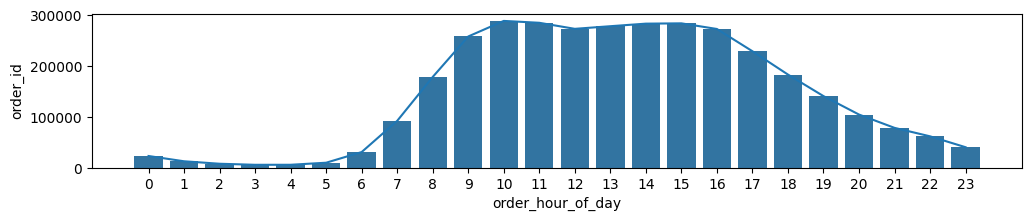

In [ ]:
pt = pd.pivot_table(orders, index='order_hour_of_day', values='order_id', aggfunc='count')

pt = pt.reset_index()
plt.figure(figsize=(12,2))
sns.barplot(data=pt, x='order_hour_of_day', y='order_id')
sns.lineplot(data=pt, x='order_hour_of_day', y='order_id')